In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams['pdf.fonttype'] = 42

In [3]:
df = pd.read_csv("data/social-spending.csv")
df.head()

,Country,Social Spending
0,France,31.5%
1,Finland,30.8%
2,Belgium,29.0%
3,Italy,28.9%
4,Denmark,28.7%


In [4]:
df.dtypes

Country            object
Social Spending    object
dtype: object

In [5]:
df['Social Spending'] = df['Social Spending'].str.rstrip('%').astype('float')

In [6]:
df.dtypes

Country             object
Social Spending    float64
dtype: object

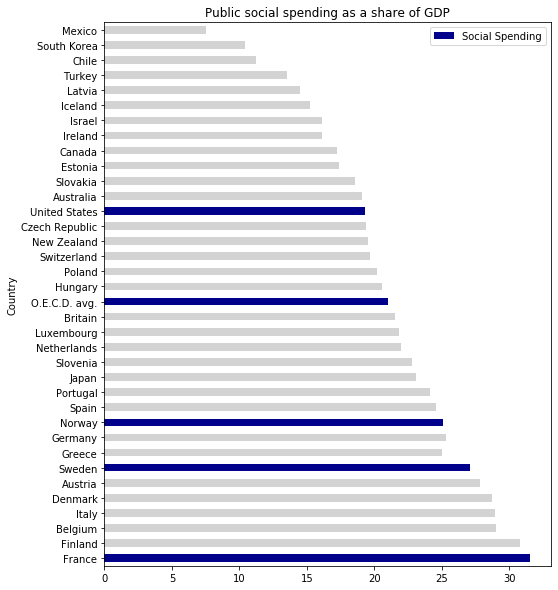

In [28]:
def build_colors(row):
    if row['Country'] == 'France':
        return 'darkblue'
    elif row['Country'] == 'Sweden':
        return 'darkblue'
    elif row['Country'] == 'Norway':
        return 'darkblue'
    elif row['Country'] == 'O.E.C.D. avg.':
        return 'darkblue'
    elif row['Country'] == 'United States':
        return 'darkblue'
    else:
        return 'lightgrey'

colors = df.apply(build_colors, axis=1)

df.plot(x='Country', y='Social Spending', kind='barh', figsize=(8, 10), color=colors, title='Public social spending as a share of GDP')

plt.savefig("graph_social_spending.pdf")

In [29]:
df = pd.read_csv("data/generic_poll_lead.csv")
df.head()

,year,lead,in_power
0,2018,13.4,no
1,2016,1.2,yes
2,2014,3.0,yes
3,2012,1.5,no
4,2010,0.4,no


In [30]:
df.dtypes

year          int64
lead        float64
in_power     object
dtype: object

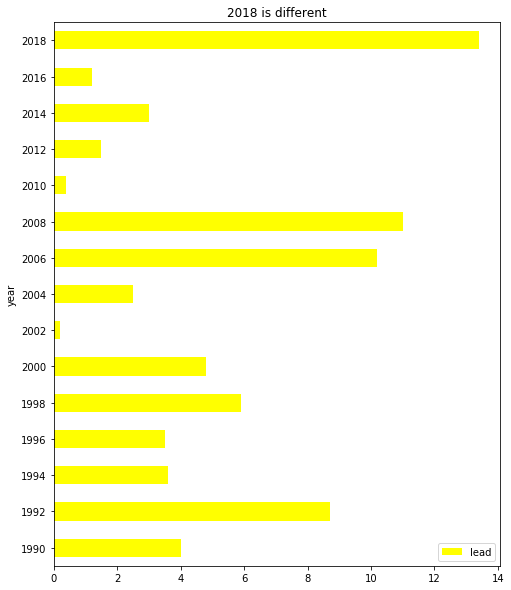

In [56]:
def build_colors(row):
    if row['year'] == '2016':
        return 'grey'
    elif row['year'] == '2014':
        return 'grey'
    elif row['year'] == '1998':
        return 'grey'
    elif row['year'] == '1996':
        return 'grey'
    elif row['year'] == '1994':
        return 'grey'
    else:
        return 'yellow'

colors = df.reset_index().apply(build_colors, axis=1)


df.sort_values(by='year').plot(x='year', y='lead', kind='barh', figsize=(8, 10), color=colors, title='2018 is different')

plt.savefig("graph_poll_lead.pdf")

In [59]:
df = pd.read_csv("data/cook_pvi.csv")
df

,cook_pvi,pct_defeated
0,C+7 or greater,76
1,C+3 to C+7,63
2,C+1 to C+3,61
3,I+1 to C+1,35
4,I+1 to I+3,25
5,I+3 to I+5,18
6,I+5 to I+10,7
7,I+10 or greater,0


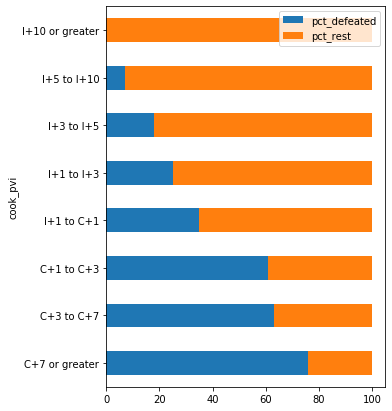

In [66]:
df['pct_rest'] = 100 - df.pct_defeated

df.plot(kind='barh', x='cook_pvi', y=['pct_defeated', 'pct_rest'], stacked=True, figsize=(5, 7))